In [6]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from itertools import combinations 

In [2]:
def clean_data(file_name):

    #Carregar DataSet
    df = pd.read_parquet(file_name)


    #Informação Inicial do Dataset
    print("\nInformação Dataset:")
    print('\n')
    print(df.info())
    print('\n')
    print(df.head())
    print('\n')
    print(df.describe())

    #Limpar Espaços em Colunas String
    df['empresa']=df['empresa'].str.strip()
    df['setor']=df['setor'].str.strip()

    #Remover Linhas com NAs
    df = df.dropna()
    print("\nNr de Observações após Remoção de NA:", len(df))

    #Remover Duplicados
    df = df.drop_duplicates()
    print("\nNr de Observações após Remoção de Duplicados:", len(df))

    #Converter Data Types de Columnas Float para Numeric
    df['energia_kwh'] = pd.to_numeric(df['energia_kwh'], errors='coerce')
    df['agua_m3'] = pd.to_numeric(df['agua_m3'], errors='coerce')
    df['co2_emissoes'] = pd.to_numeric(df['co2_emissoes'], errors='coerce')

    #Remover observações com valores não numéricos para as 3 colunas numéricas
    df = df.dropna(subset=['energia_kwh', 'agua_m3', 'co2_emissoes'])
    print("\nNr de Observações após Verificação Colunas Numéricas:", len(df))

    #Resumo Estatístico
    print('\nResumo Estatístico de Colunas Numérias')
    print(df[['energia_kwh', 'agua_m3', 'co2_emissoes']].describe())

    #Verificar se Existe Correlação entre as 3 colunas numéricas
    print('\nMatrix de Correlação')
    print(df[['energia_kwh', 'agua_m3', 'co2_emissoes']].corr())


    #Função para Remover Outliers
    def remove_outliers(df, column_name):
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    df_clean = df.copy()
    df_clean = remove_outliers(df_clean, 'energia_kwh')
    df_clean = remove_outliers(df_clean, 'agua_m3')
    df_clean = remove_outliers(df_clean, 'co2_emissoes')

    #Informação Dataset Tratado
    print('\nInformações Dataset Tratado')
    print('\n')
    print(df_clean.info())
    print('\n')
    print(df_clean.head())

    return df_clean

In [7]:
df = clean_data('dados_sensores_5000.parquet')


Informação Dataset:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   empresa       5000 non-null   object 
 1   energia_kwh   5000 non-null   float64
 2   agua_m3       5000 non-null   float64
 3   co2_emissoes  5000 non-null   float64
 4   setor         5000 non-null   object 
dtypes: float64(3), object(2)
memory usage: 195.4+ KB
None


     empresa  energia_kwh  agua_m3  co2_emissoes      setor
0  Empresa_1      6397.10   296.58       1600.24   Educação
1  Empresa_2      2570.30   492.52        818.98      Saúde
2  Empresa_3      4166.20   158.67       2710.03      Saúde
3  Empresa_4      8781.75   211.74       2036.72   Educação
4  Empresa_5      7846.09    16.84       2179.03  Indústria


       energia_kwh      agua_m3  co2_emissoes
count  5000.000000  5000.000000   5000.000000
mean   4982.012088   254.591516   1507.816080
std    28

In [8]:
df[['energia_kwh', 'agua_m3', 'co2_emissoes']].corr()

,energia_kwh,agua_m3,co2_emissoes
energia_kwh,1.000000,-0.019757,0.001158
agua_m3,-0.019757,1.000000,0.018947
co2_emissoes,0.001158,0.018947,1.000000


In [9]:
df.describe()

,energia_kwh,agua_m3,co2_emissoes
count,5000.000000,5000.000000,5000.000000
mean,4982.012088,254.591516,1507.816080
std,2821.081316,139.225517,849.554449
min,100.620000,10.120000,51.120000
25%,2581.745000,138.082500,774.130000
50%,4936.540000,250.895000,1492.695000
75%,7425.097500,373.512500,2258.457500
max,9993.800000,499.760000,2999.640000


In [10]:
#Agrupar por Empresa e Encontrar Empresa com Maior Consumo

# Agrupar por empresa
df_agrupado_emp = df.groupby("empresa").sum(numeric_only=True)

# Encontrar as empresas com maior consumo
maior_energia_emp = df_agrupado_emp["energia_kwh"].idxmax()
maior_energia_emp_val = max(df_agrupado_emp["energia_kwh"])
maior_agua_emp = df_agrupado_emp["agua_m3"].idxmax()
maior_agua_emp_val = max(df_agrupado_emp["agua_m3"])
maior_co2_emp = df_agrupado_emp["co2_emissoes"].idxmax()
maior_co2_emp_val = max(df_agrupado_emp["co2_emissoes"])

print(f"Empresa com maior consumo de energia: {maior_energia_emp} com {maior_energia_emp_val} kwh")
print(f"Empresa com maior consumo de água: {maior_agua_emp} com {maior_agua_emp_val} m3")
print(f"Empresa com maior emissão de CO₂: {maior_co2_emp} com {maior_co2_emp_val} emissões")


Empresa com maior consumo de energia: Empresa_721 com 9993.8 kwh
Empresa com maior consumo de água: Empresa_2081 com 499.76 m3
Empresa com maior emissão de CO₂: Empresa_1141 com 2999.64 emissões


In [11]:
#Agrupar por Empresa e Encontrar Empresa com Menor Consumo

# Agrupar por empresa
df_agrupado_emp = df.groupby("empresa").sum(numeric_only=True)

# Encontrar as empresas com menor consumo
menor_energia_emp = df_agrupado_emp["energia_kwh"].idxmin()
menor_energia_emp_val = min(df_agrupado_emp["energia_kwh"])
menor_agua_emp = df_agrupado_emp["agua_m3"].idxmin()
menor_agua_emp_val = min(df_agrupado_emp["agua_m3"])
menor_co2_emp = df_agrupado_emp["co2_emissoes"].idxmin()
menor_co2_emp_val = min(df_agrupado_emp["co2_emissoes"])

print(f"Empresa com menor consumo de energia: {menor_energia_emp} com {menor_energia_emp_val} kwh")
print(f"Empresa com menor consumo de água: {menor_agua_emp} com {menor_agua_emp_val} m3")
print(f"Empresa com menor emissão de CO₂: {menor_co2_emp} com {menor_co2_emp_val} em emissões de CO₂")

Empresa com menor consumo de energia: Empresa_4216 com 100.62 kwh
Empresa com menor consumo de água: Empresa_1513 com 10.12 m3
Empresa com menor emissão de CO₂: Empresa_3676 com 51.12 em emissões de CO₂


In [12]:
#Agrupar por Setor e Encontrar Setor com Maior e Menor Consumo

# Agrupar por setor e somar os valores
df_agrupado = df.groupby("setor").sum(numeric_only=True)

# Encontrar os setores com maior consumo
maior_energia = df_agrupado["energia_kwh"].idxmax()
maior_agua = df_agrupado["agua_m3"].idxmax()
maior_co2 = df_agrupado["co2_emissoes"].idxmax()

print(f"Setor com maior consumo de energia: {maior_energia}")
print(f"Setor com maior consumo de água: {maior_agua}")
print(f"Setor com maior emissão de CO₂: {maior_co2}")

#Encontrar os setores com menor consumo
menor_energia = df_agrupado["energia_kwh"].idxmin()
menor_agua = df_agrupado["agua_m3"].idxmin()
menor_co2 = df_agrupado["co2_emissoes"].idxmin()

print('\n')
print(f"Setor com menor consumo de energia: {menor_energia}")
print(f"Setor com menor consumo de água: {menor_agua}")
print(f"Setor com menor emissão de CO₂: {menor_co2}")

# Exibir os valores totais por setor
print("\nConsumo total por setor:")
print(df_agrupado)

Setor com maior consumo de energia: Varejo
Setor com maior consumo de água: Varejo
Setor com maior emissão de CO₂: Varejo


Setor com menor consumo de energia: Educação
Setor com menor consumo de água: Educação
Setor com menor emissão de CO₂: Educação

Consumo total por setor:
             energia_kwh    agua_m3  co2_emissoes
setor                                            
Alimentação   4053911.26  216478.84    1251522.37
Educação      3959621.83  202950.26    1233811.00
Indústria     4308235.40  212342.69    1268634.06
Saúde         4175034.92  216138.42    1246458.00
Serviços      4077210.86  207290.89    1254844.02
Varejo        4336046.17  217756.48    1283810.95


/var/folders/nj/f48j_dh50ns_637073bpmy240000gn/T/ipykernel_13088/1068070671.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(df_agrupado.index, rotation=45)
/var/folders/nj/f48j_dh50ns_637073bpmy240000gn/T/ipykernel_13088/1068070671.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(df_agrupado.index, rotation=45)
/var/folders/nj/f48j_dh50ns_637073bpmy240000gn/T/ipykernel_13088/1068070671.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(df_agrupado.index, rotation=45)


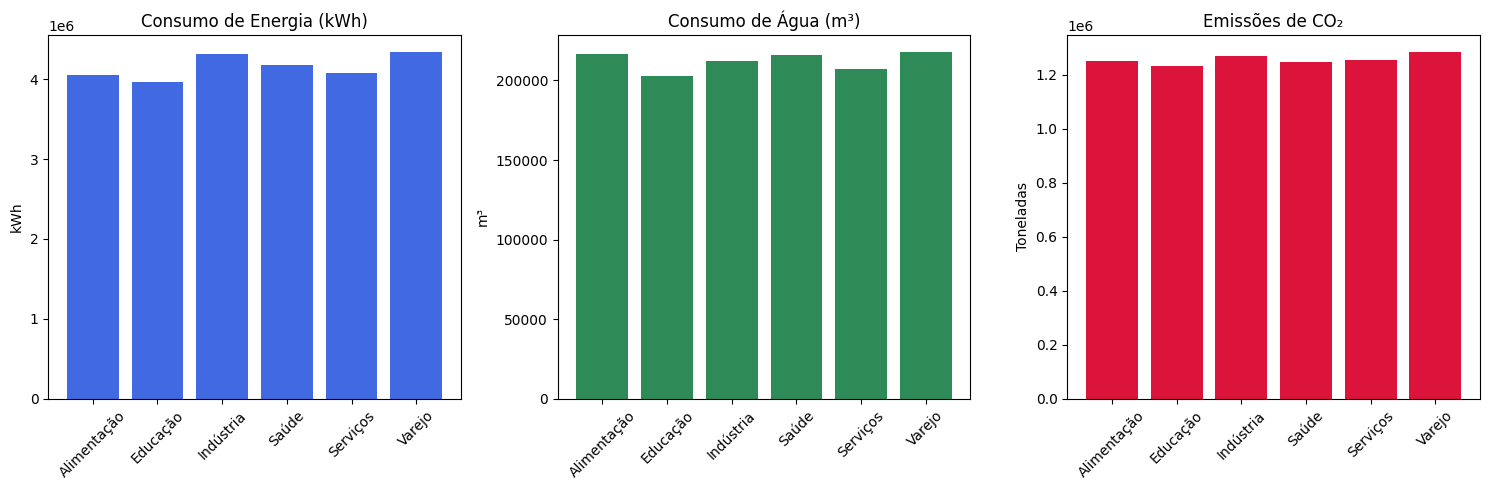

In [13]:
#Agrupar por Setor e Verificar Consumos

# Agrupar os dados por setor
df_agrupado = df.groupby("setor").sum(numeric_only=True)

# Criar os subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=False)  # 1 linha, 3 colunas

# Plot Energia
axes[0].bar(df_agrupado.index, df_agrupado["energia_kwh"], color="royalblue")
axes[0].set_title("Consumo de Energia (kWh)")
axes[0].set_ylabel("kWh")
axes[0].set_xticklabels(df_agrupado.index, rotation=45)

# Plot Água
axes[1].bar(df_agrupado.index, df_agrupado["agua_m3"], color="seagreen")
axes[1].set_title("Consumo de Água (m³)")
axes[1].set_ylabel("m³")
axes[1].set_xticklabels(df_agrupado.index, rotation=45)

# Plot CO₂
axes[2].bar(df_agrupado.index, df_agrupado["co2_emissoes"], color="crimson")
axes[2].set_title("Emissões de CO₂")
axes[2].set_ylabel("Toneladas")
axes[2].set_xticklabels(df_agrupado.index, rotation=45)

# Ajustar layout para não sobrepor labels
plt.tight_layout()

plt.show()

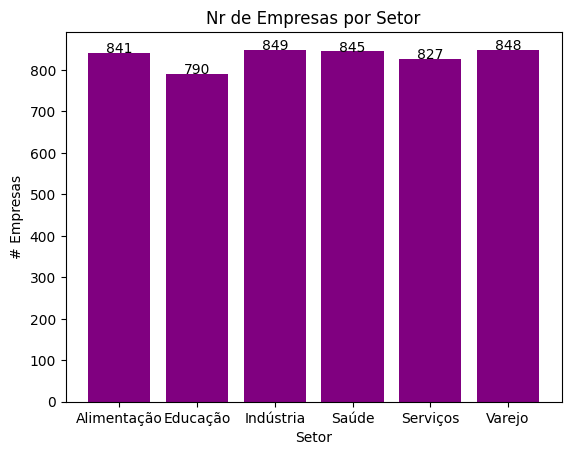

In [14]:
#Agrupar po Setor e Verificar Nr de Empresas de Cada Setor

#Verificar se algum sector têm um nr de empresas significativamente diferente
nr_empresas = df.groupby("setor")['empresa'].count().reset_index()
nr_empresas.columns =['setor', 'empresas']

#print(nr_empresas)

df_agrupado_setor = df.groupby("setor").sum(numeric_only=True)

#Plot Chart
plt.bar(nr_empresas['setor'], nr_empresas['empresas'], color="purple")
plt.title("Nr de Empresas por Setor")
plt.xlabel("Setor")
plt.ylabel("# Empresas")

for i in range(len(nr_empresas)):
    plt.text(i, nr_empresas['empresas'][i] + 0.05, str(nr_empresas['empresas'][i]), 
             ha='center', color='black')


plt.show()

/var/folders/nj/f48j_dh50ns_637073bpmy240000gn/T/ipykernel_13088/71755075.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(merged_df['setor'], rotation=45)
/var/folders/nj/f48j_dh50ns_637073bpmy240000gn/T/ipykernel_13088/71755075.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(merged_df['setor'], rotation=45)
/var/folders/nj/f48j_dh50ns_637073bpmy240000gn/T/ipykernel_13088/71755075.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(merged_df['setor'], rotation=45)


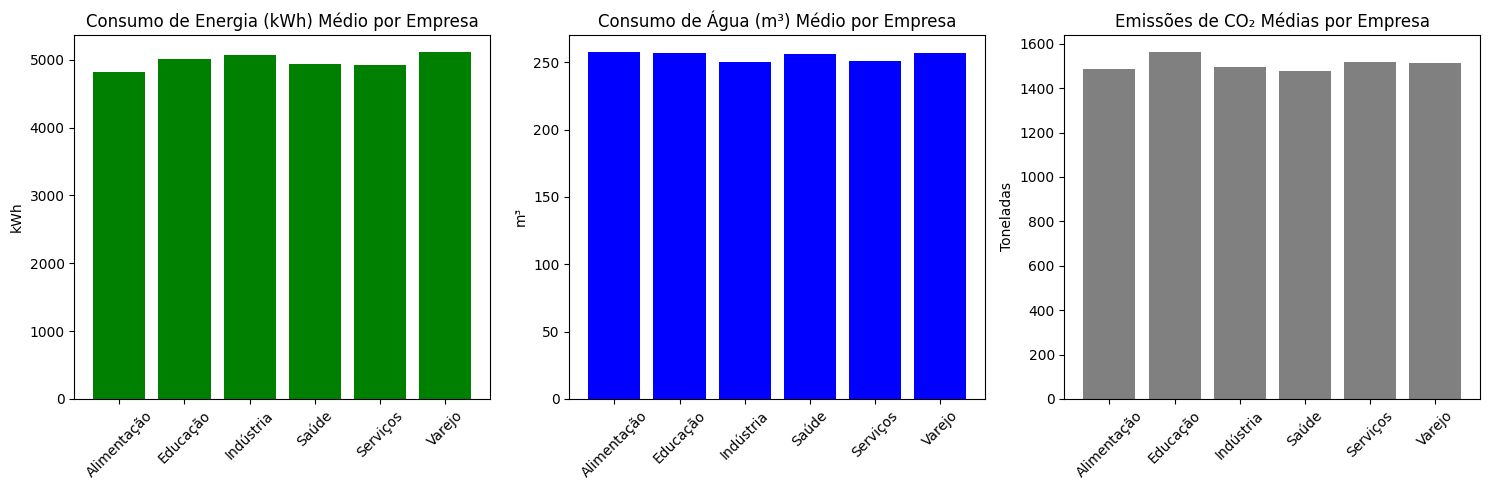

Setor com maior consumo médio de energia por empresa: Varejo
Setor com maior consumo médio de água por empresa: Alimentação
Setor com maior média de emissão de CO₂ por empresa: Educação


Setor com menor consumo médio de energia por empresa: Alimentação
Setor com menor consumo médio de água por empresa: Indústria
Setor com menor média de emissão de CO₂ por empresa: Saúde


In [15]:
#Encontrar Consumo por Setor por Empresa

# Agrupar por setor e somar os valores
df_setor = df.groupby('setor').sum().reset_index()

# Step 2: Group by 'sector' and count the number of companies in each sector
df_nrempresas = df.groupby('setor')['empresa'].count().reset_index()

# Step 3: Merge the two DataFrames on 'sector' to get both total consumption and company count in one DataFrame
merged_df = pd.merge(df_setor, df_nrempresas, on='setor')

#print(merged_df.describe())

# Step 4: Calculate the consumption per company by dividing the total consumption by the number of companies
merged_df['energia_kwh_por_empresa'] = merged_df['energia_kwh'] / merged_df['empresa_y']
merged_df['agua_m3_por_empresa'] = merged_df['agua_m3'] / merged_df['empresa_y']
merged_df['co2_emissoes_por_empresa'] = merged_df['co2_emissoes'] / merged_df['empresa_y']

# Display the result
#print(merged_df[['setor', 'energia_kwh_por_empresa', 'agua_m3_por_empresa', 'co2_emissoes_por_empresa']])


#Representação Gráfica
# Criar os subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=False)  # 1 linha, 3 colunas

# Plot Energia
axes[0].bar(merged_df['setor'], merged_df["energia_kwh_por_empresa"], color="green")
axes[0].set_title("Consumo de Energia (kWh) Médio por Empresa")
axes[0].set_ylabel("kWh")
axes[0].set_xticklabels(merged_df['setor'], rotation=45)

# Plot Água
axes[1].bar(merged_df['setor'], merged_df["agua_m3_por_empresa"], color="blue")
axes[1].set_title("Consumo de Água (m³) Médio por Empresa")
axes[1].set_ylabel("m³")
axes[1].set_xticklabels(merged_df['setor'], rotation=45)

# Plot CO₂
axes[2].bar(merged_df['setor'], merged_df["co2_emissoes_por_empresa"], color="grey")
axes[2].set_title("Emissões de CO₂ Médias por Empresa")
axes[2].set_ylabel("Toneladas")
axes[2].set_xticklabels(merged_df['setor'], rotation=45)

# Ajustar layout para não sobrepor labels
plt.tight_layout()

plt.show()


# Encontrar os setores com maior consumo por empresa
maior_energia_pemp = merged_df['setor'][merged_df["energia_kwh_por_empresa"].idxmax()]
maior_agua_pemp = merged_df['setor'][merged_df["agua_m3_por_empresa"].idxmax()]
maior_co2_pemp = merged_df['setor'][merged_df["co2_emissoes_por_empresa"].idxmax()]


print(f"Setor com maior consumo médio de energia por empresa: {maior_energia_pemp}")
print(f"Setor com maior consumo médio de água por empresa: {maior_agua_pemp}")
print(f"Setor com maior média de emissão de CO₂ por empresa: {maior_co2_pemp}")

#Encontrar os setores com menor consumo
menor_energia_pemp = merged_df['setor'][merged_df["energia_kwh_por_empresa"].idxmin()]
menor_agua_pemp = merged_df['setor'][merged_df["agua_m3_por_empresa"].idxmin()]
menor_co2_pemp = merged_df['setor'][merged_df["co2_emissoes_por_empresa"].idxmin()]

print('\n')
print(f"Setor com menor consumo médio de energia por empresa: {menor_energia_pemp}")
print(f"Setor com menor consumo médio de água por empresa: {menor_agua_pemp}")
print(f"Setor com menor média de emissão de CO₂ por empresa: {menor_co2_pemp}")




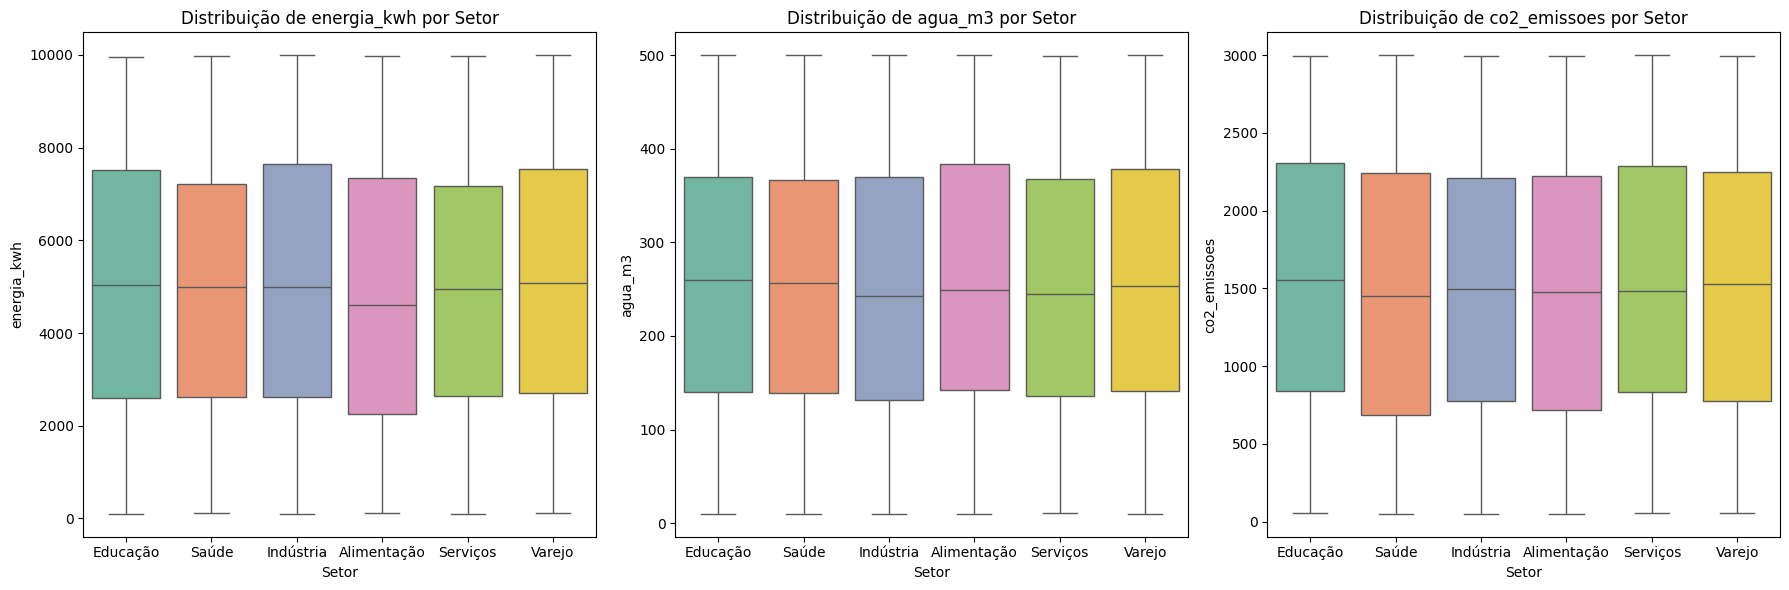

In [18]:
#BoxPlot the Consumos por Setor

import matplotlib.pyplot as plt
import seaborn as sns

# Definir as colunas
colunas = ['energia_kwh', 'agua_m3', 'co2_emissoes']

# Criar o gráfico
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Gerar boxplots para cada coluna
for i, coluna in enumerate(colunas):
    sns.boxplot(data=df, x='setor', y=coluna, hue='setor', ax=axes[i], palette="Set2")
    axes[i].set_title(f"Distribuição de {coluna} por Setor")
    axes[i].set_xlabel('Setor')
    axes[i].set_ylabel(coluna)

# Ajustar o layout
plt.tight_layout()

# Mostrar os gráficos
plt.show()

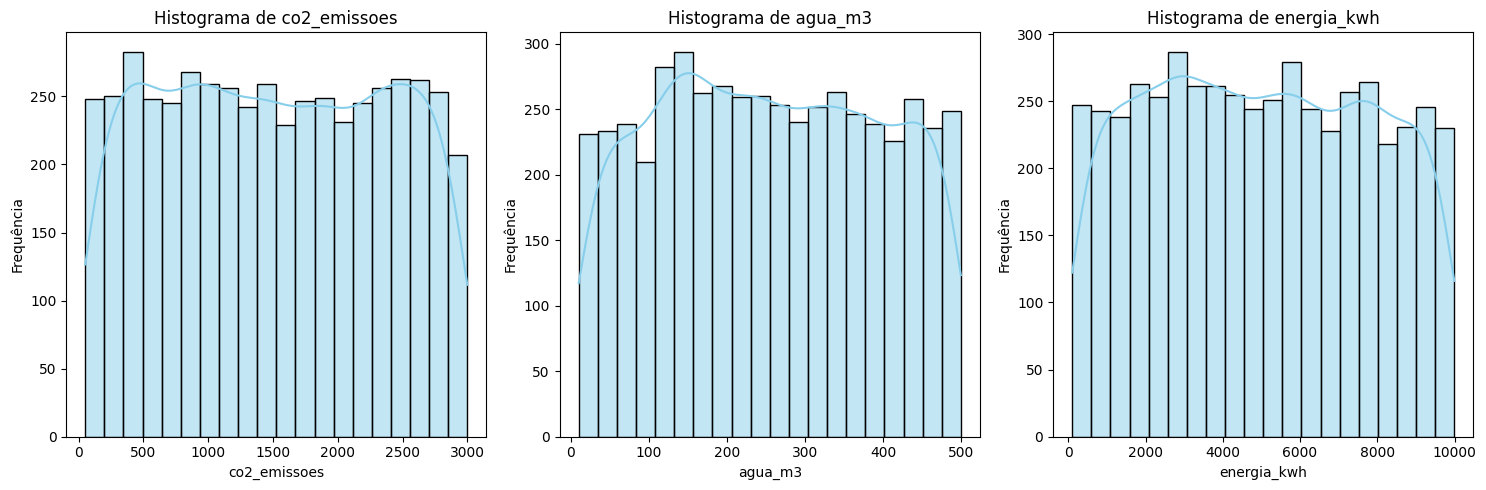

In [16]:
#Histograma de Consumos

# Definir as colunas
colunas = ['co2_emissoes', 'agua_m3', 'energia_kwh']

# Criar o gráfico
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Gerar histogramas e a linha de ajuste para cada coluna
for i, coluna in enumerate(colunas):
    # Plotando o histograma
    sns.histplot(df[coluna], kde=True, bins=20, color='skyblue', edgecolor='black', ax=axes[i])
    
    # Definindo o título e os rótulos
    axes[i].set_title(f"Histograma de {coluna}")
    axes[i].set_xlabel(coluna)
    axes[i].set_ylabel('Frequência')

# Ajustar o layout
plt.tight_layout()

# Mostrar os gráficos
plt.show()

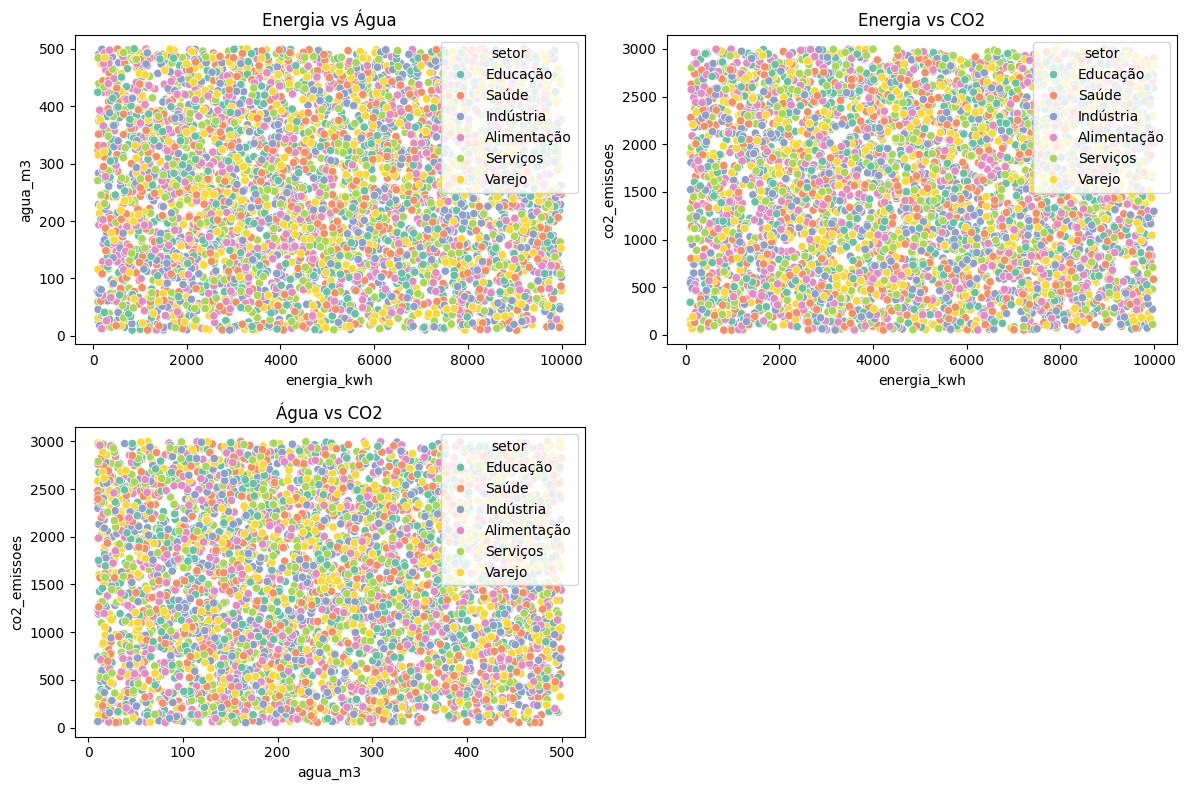

In [19]:
#Dispersão Entre Variáveis por Setor

# Gráfico de dispersão entre as variáveis
plt.figure(figsize=(12, 8))

# Energia x Água
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='energia_kwh', y='agua_m3', hue='setor', palette='Set2')
plt.title('Energia vs Água')

# Energia x CO2
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='energia_kwh', y='co2_emissoes', hue='setor', palette='Set2')
plt.title('Energia vs CO2')

# Água x CO2
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='agua_m3', y='co2_emissoes', hue='setor', palette='Set2')
plt.title('Água vs CO2')

plt.tight_layout()
plt.show()

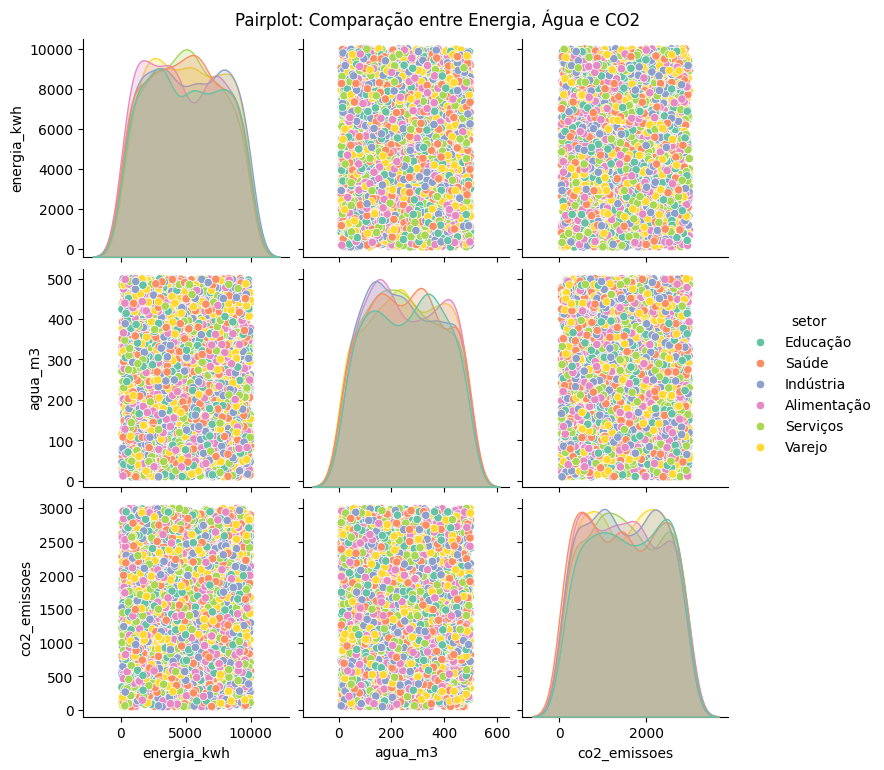

In [20]:
# Incluir a coluna 'setor' na seleção para o pairplot
sns.pairplot(df[['energia_kwh', 'agua_m3', 'co2_emissoes', 'setor']], hue='setor', palette='Set2')
plt.suptitle("Pairplot: Comparação entre Energia, Água e CO2", y=1.02)
plt.show()